# **Feature Engineering**

### Topic 01 : Handling Missing Values

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
# Load Dataset

df = sns.load_dataset('titanic')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# df.isnull().sum()



*Result :(column_name,datatype,no.of null value)*  <br>
age --> float -- 177<br>
embarked --> object --2<br>
deck --> sns.category -- 688


#### *Imputation Missing Value*

> Mean Value Imputation


> Median Value Imputation

> Mode Imputation


#### Age >> float >> 177 missing value

In [ ]:
print("Age : Mean",df.age.mean(),"Age : Median",df.age.median(),"Age : Mode",df.age.mode())

Age : Mean 29.69911764705882 Age : Median 28.0 Age : Mode 0    24.0
Name: age, dtype: float64


<Axes: xlabel='age', ylabel='Count'>

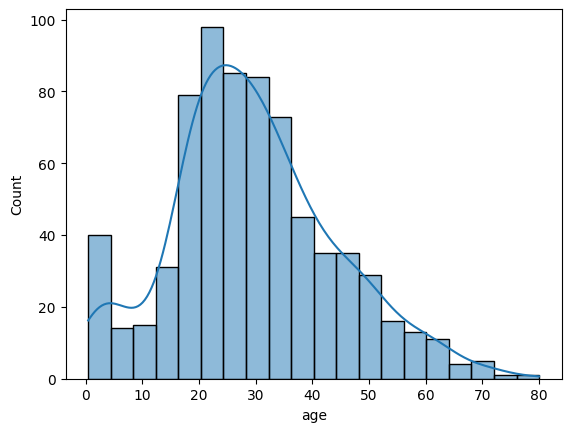

In [ ]:
sns.histplot(df["age"],kde=True)

In [ ]:
# According above graph Mainly data lies between 20 - 40
# That means age data follow normal distribution.
# According Age data we can replace null value by mean of that colum

df['Age_mean'] = df["age"].fillna(df["age"].mean())

## MEan Imputation Works Well when we have normally distributed data

<Axes: xlabel='Age_mean', ylabel='Count'>

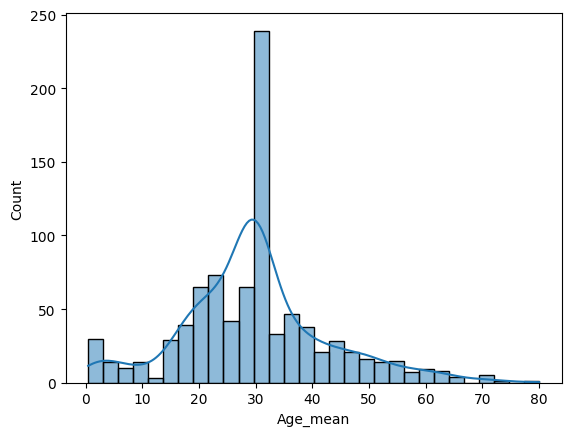

In [ ]:
sns.histplot(df["Age_mean"],kde=True)

####  Embarked >> Object Data Type >> 2 missing value

<Axes: xlabel='embarked', ylabel='count'>

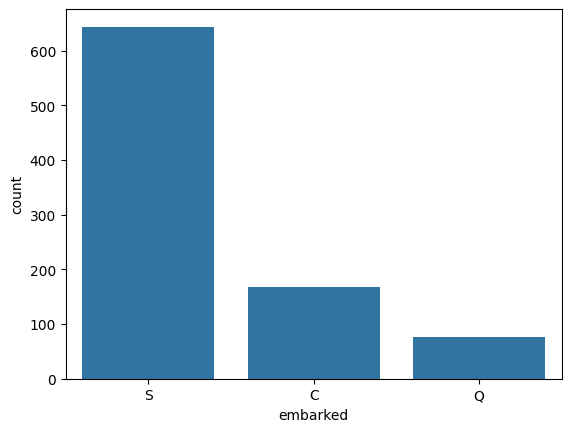

In [ ]:
sns.countplot(x=df["embarked"])

In [ ]:
# embarked columns contain object type data so we relace null value by mode of this columns

mode_value = df[df["embarked"].notna()]["embarked"].mode()[0]


In [ ]:
df["embarked_mode"] = df["embarked"].fillna(mode_value)

In [ ]:
# df.drop(columns=["embarked_mode"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   survived       891 non-null    int64   
 1   pclass         891 non-null    int64   
 2   sex            891 non-null    object  
 3   age            714 non-null    float64 
 4   sibsp          891 non-null    int64   
 5   parch          891 non-null    int64   
 6   fare           891 non-null    float64 
 7   embarked       889 non-null    object  
 8   class          891 non-null    category
 9   who            891 non-null    object  
 10  adult_male     891 non-null    bool    
 11  embark_town    889 non-null    object  
 12  alive          891 non-null    object  
 13  alone          891 non-null    bool    
 14  Age_mean       891 non-null    float64 
 15  embarked_mode  891 non-null    object  
dtypes: bool(2), category(1), float64(3), int64(4), object(6)
memory usage: 93.4+ KB


#### deck >> catogorical >> 688

In [ ]:
df.shape
sns.countplot(x=df["deck"])

In [ ]:
# Drop deck columns
df.drop(columns=["deck"],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
 14  Age_mean     891 non-null    float64 
dtypes: bool(2), category(1), float64(3), int64(4), object(5)
memory usage: 86.4+ KB


### Topic 02 : Handling Imbalanced Dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes

n_sample = 1000
class_0_ratio = 0.9
n_class_0 = int(n_sample * class_0_ratio)
n_class_1 = n_sample - n_class_0

class_0 = pd.DataFrame({
    "feature_1" : np.random.normal(loc=0, scale=1, size= n_class_0),
    "feature_2" : np.random.normal(loc=0, scale=1, size= n_class_0),
    "target":[0]*n_class_0
})

class_1 = pd.DataFrame({
    "feature_1" : np.random.normal(loc=2, scale=1, size= n_class_1),
    "feature_2" : np.random.normal(loc=2, scale=1, size= n_class_1),
    "target":[1]*n_class_1
})
# class_0.head(2)

In [ ]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)

In [ ]:
df["target"].value_counts()

,count
target,
0,900
1,100


#### **Upsampling** : *We can increase minority data point. In short We  repete the minority datapoint. the new data point which has output 1 which is minority output.*

In [ ]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [ ]:
df_minority.tail()
df_majority.tail()

,feature_1,feature_2,target
895,0.238761,-0.003155,0
896,-1.106386,-0.430660,0
897,0.366732,-0.146416,0
898,1.023906,1.160176,0
899,-0.210056,-0.641512,0


In [ ]:
# import sklearn.utils
from sklearn.utils import resample

In [ ]:
df_minority_upsample = resample(df_minority, # increase minority data-point
                                replace = True, # IMP : It well create new datap -point
                                n_samples =  len(df_majority), # how many datapoint well created?
                                random_state = 42
                                )

In [ ]:
df_minority_upsample.shape

(900, 3)

In [ ]:
df_minority_upsample.head(1)
df_upsample.shape

(1800, 3)

In [ ]:
df_minority_upsample["target"].value_counts()

,count
target,
1,900


In [ ]:
# to create new database
df_upsample = pd.concat([df_majority,df_minority_upsample])

In [ ]:
df_upsample.head(2)

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0


In [ ]:
df_upsample["target"].value_counts()

,count
target,
0,900
1,900


#### **Down_Sampling** *: To reduce number of data point which has majority ouput. In short We reduce datapoint*

In [ ]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]
# df_minority

In [ ]:
df_majority_downsample = resample(df_majority, # decrease majority data-point
                                replace = False, # IMP : It will reduce data point
                                n_samples =  len(df_minority), # how many datapoint well created?
                                random_state = 42
                                )

In [ ]:
df_majority_downsample.shape

(100, 3)

In [ ]:
df_downsample = pd.concat([df_minority,df_majority_downsample])

In [ ]:
df_downsample.shape

(200, 3)

In [ ]:
df_downsample["target"].value_counts()

,count
target,
1,100
0,100


### Topic 03 : **SMOTS (Synthetic Minority Oversampling Technique)**
SMOTE is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instance than the majority calss. SMOTE inolves synthetic of the minority class by interpolating between existing instances.

In [9]:
import pandas as pd

In [4]:
from sklearn.datasets import make_classification

In [7]:
make_classification(n_samples = 1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=12)

(array([[-0.76289759, -0.70680807],
        [-1.07543571, -1.0511621 ],
        [-0.61011459, -0.90980157],
        ...,
        [-1.32643852, -1.815178  ],
        [-0.83348573, -0.5146474 ],
        [-0.30287558, -0.57597532]]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [5]:
# X is independent (input)
# y is dependent (output)
X,y = make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1, weights=[0.90],random_state=12)

In [10]:
df1 = pd.DataFrame(X,columns=["f1","f2"])
df2 = pd.DataFrame(y,columns=["target"])

In [12]:
df = pd.concat([df1,df2],axis = 1)

In [ ]:
df.head(2)

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0


In [ ]:
df["target"].value_counts()

,count
target,
0,900
1,100


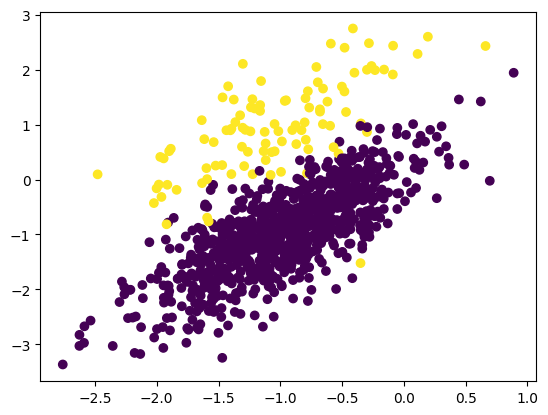

In [19]:
import matplotlib.pyplot as plt
plt.scatter(df["f1"],df["f2"],c=df["target"])

#### **Implement SMOTE**

In [ ]:
# install SMOTE
!pip install imblearn

In [1]:
# import libary
from imblearn.over_sampling import SMOTE

In [13]:
oversample = SMOTE()
X,y = oversample.fit_resample(df[["f1","f2"]],df["target"])

In [ ]:
X

,f1,f2
0,-0.762898,-0.706808
1,-1.075436,-1.051162
2,-0.610115,-0.909802
3,-2.023284,-0.428945
4,-0.812921,-1.316206
...,...,...
1795,-1.426948,1.676667
1796,-1.908565,0.490277
1797,-0.507476,0.346562
1798,-0.686971,1.291175


In [14]:
df1 = pd.DataFrame(X,columns=["f1","f2"])
df2 = pd.DataFrame(y,columns=["target"])

In [15]:
df1.head()

,f1,f2
0,-0.762898,-0.706808
1,-1.075436,-1.051162
2,-0.610115,-0.909802
3,-2.023284,-0.428945
4,-0.812921,-1.316206


In [16]:
df_smote = pd.concat([df1,df2],axis=1)

In [17]:
df_smote.shape

(1800, 3)

In [ ]:
df_smote["target"].value_counts()

,count
target,
0,900
1,900


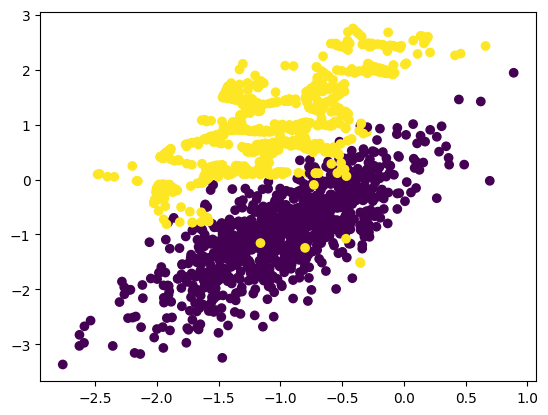

In [20]:
plt.scatter(df_smote['f1'],df_smote['f2'],c= df_smote['target'])

## Topic 04 : **Data Interpolation**
Data interpolation is the process of estimation unknown values within a dataset based o the known values. In Python, there are various libraries available that can be used for data interpolation, such as NumPy, SciPy and Pandas. Here is an example of how to perform data interpolation using the NumPy library.

#### Linear Interpolation :

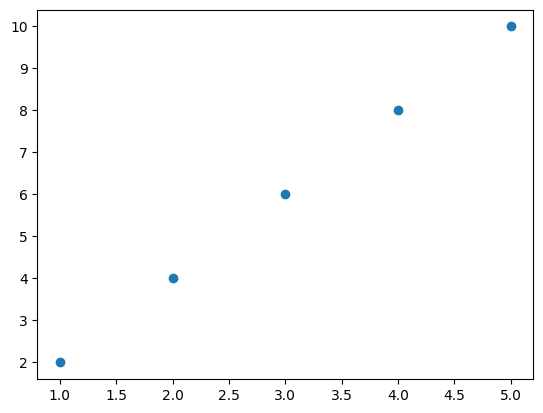

In [26]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5])
y = np.array([2,4,6,8,10])
plt.scatter(x,y)

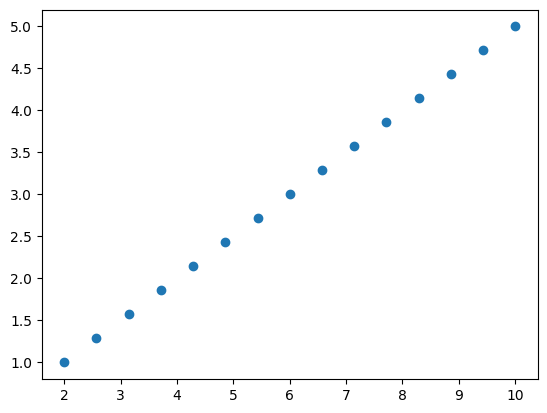

In [43]:
# interpolate the data using linear interpolation
x_new = np.linspace(1,5,15) # Create new x values
y_interp = np.interp(x_new,x,y) # interpolate y values
len(x),len(y),len(x_new),len(y_interp)
plt.scatter(y_interp,x_new)

#### Cubic Interpolation with Scipy

In [51]:
import numpy as np
x = np.array([1,2,3,4,5])
y = np.array([1,8,27,64,125])

In [52]:
from scipy.interpolate import interp1d

In [53]:
# Create a cubic interpolation function
f = interp1d(x,y,kind="cubic")
# type(f)

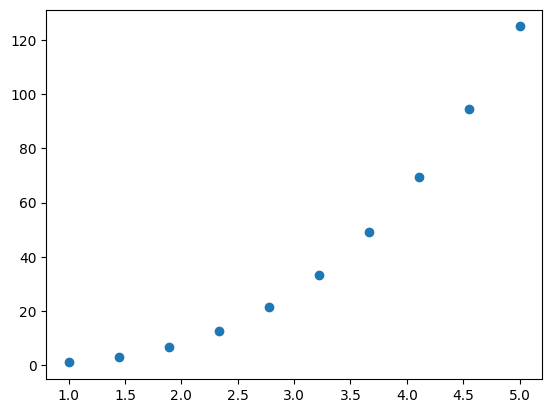

In [54]:
x_new = np.linspace(1,5,10)
y_interp = f(x_new)
y_interp
plt.scatter(x_new,y_interp)

#### Polynomial Interpolation

In [55]:
import numpy as np

# Create simple data
x = np.array([1,2,3,4,5])
y = np.array([1,4,9,16,25])

In [57]:
# interpolate the data using polynomial interpolation
p = np.polyfit(x,y, 2) # fit a 2nd degree polynomial to the data

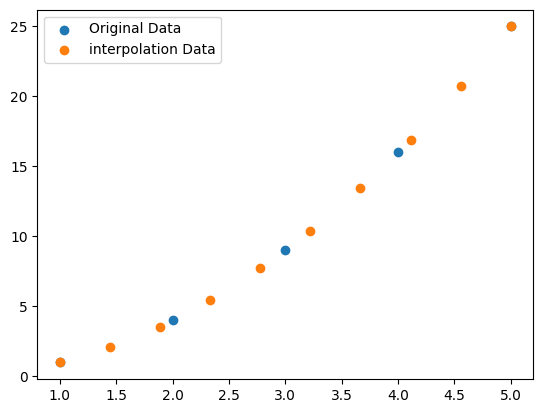

In [64]:
x_new = np.linspace(1,5,10) # Create new x values
y_interp = np.polyval(p,x_new)
plt.scatter(x,y,label="Original Data") # inishale data
plt.scatter(x_new,y_interp,label="interpolation Data")
plt.legend()

## Topic 05 : **Handling Outliers**

#### **5 Number Summary :**
1. Minimum Value
2. 1% to 25% : 1 Quadrant
3. Median
4. 75% above : Quadrant
5. Maximum Value



In [98]:
import numpy as np
lst_marks = [-100,45,32,56,75,89,90,87,6,54,45,98,99,67,74,1000,1100]

In [99]:

np.percentile(lst_marks,[25])
# 25% of lst_marks is 51.75%

np.percentile(lst_marks,[75])
# 75% of lst_marks is 92%

array([90.])

In [100]:
## [Lower Fence <--------> Higher Fence]
Q1 = np.percentile(lst_marks,[25])
Q3 = np.percentile(lst_marks,[75])

In [101]:
# In another way
minimum,Q1,Q2,Q3,maximum = np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])
print(f"minimum : {minimum}, Q1 : {Q1}, Q2 : {Q2}, Q3 : {Q3}, Maximum :{maximum}")

minimum : -100.0, Q1 : 45.0, Q2 : 74.0, Q3 : 90.0, Maximum :1100.0


In [102]:
IQR = Q3 - Q1
print(f"IQR : {IQR}")

IQR : 45.0


In [103]:
lower_fence = Q1-1.5*(IQR)
higher_fence = Q3+1.5*(IQR)
print(f"Lowere Fence : {lower_fence} , Higher Fence : {higher_fence}")

Lowere Fence : -22.5 , Higher Fence : 157.5


In [104]:
outliers = []
for i in lst_marks:
  if i>=lower_fence and i <= higher_fence:
    print(f" {i} is not an Outliere")
  else:
    outliers.append(i)
print(f"Outliers is : {outliers}")

 45 is not an Outliere
 32 is not an Outliere
 56 is not an Outliere
 75 is not an Outliere
 89 is not an Outliere
 90 is not an Outliere
 87 is not an Outliere
 6 is not an Outliere
 54 is not an Outliere
 45 is not an Outliere
 98 is not an Outliere
 99 is not an Outliere
 67 is not an Outliere
 74 is not an Outliere
Outliers is : [-100, 1000, 1100]


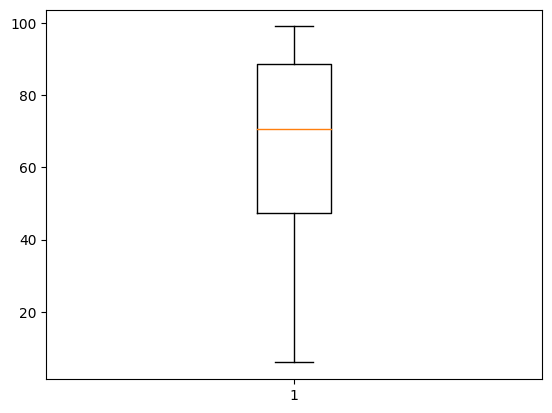

In [110]:
import matplotlib.pyplot as plt
plt.boxplot(lst_marks)
plt.show()

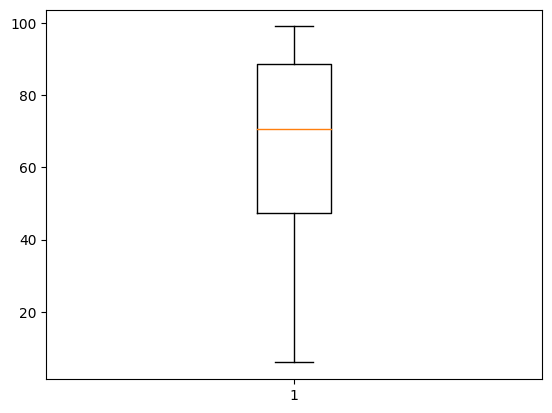

In [106]:
# Without Outliers
import numpy as np
import matplotlib.pyplot as plt

lst_marks = [45,32,56,75,89,90,87,6,54,45,98,99,67,74]

plt.boxplot(lst_marks)
plt.show()